In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-detection/no/no26.jpg
/kaggle/input/brain-tumor-detection/no/no979.jpg
/kaggle/input/brain-tumor-detection/no/no598.jpg
/kaggle/input/brain-tumor-detection/no/no141.jpg
/kaggle/input/brain-tumor-detection/no/no715.jpg
/kaggle/input/brain-tumor-detection/no/no122.jpg
/kaggle/input/brain-tumor-detection/no/no457.jpg
/kaggle/input/brain-tumor-detection/no/no895.jpg
/kaggle/input/brain-tumor-detection/no/no446.jpg
/kaggle/input/brain-tumor-detection/no/no395.jpg
/kaggle/input/brain-tumor-detection/no/no89.jpg
/kaggle/input/brain-tumor-detection/no/no632.jpg
/kaggle/input/brain-tumor-detection/no/no420.jpg
/kaggle/input/brain-tumor-detection/no/no634.jpg
/kaggle/input/brain-tumor-detection/no/no1142.jpg
/kaggle/input/brain-tumor-detection/no/no473.jpg
/kaggle/input/brain-tumor-detection/no/no1244.jpg
/kaggle/input/brain-tumor-detection/no/no474.jpg
/kaggle/input/brain-tumor-detection/no/no706.jpg
/kaggle/input/brain-tumor-detection/no/no161.jpg
/kaggle/input/brain-

In [2]:
from IPython.display import clear_output
!pip install imutils
!pip install colorama
clear_output()

In [3]:
#import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16
##
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping


from keras.models import Model
from keras.layers import Flatten,Dense, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D , GlobalMaxPooling2D, Dropout


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
image_directory='/kaggle/input/brain-tumor-detection/'
no_tumor_images=os.listdir(image_directory+ 'no/')
yes_tumor_images=os.listdir(image_directory+ 'yes/')

print('No Tumor: ', len(no_tumor_images))
print('Tumor: ',len(yes_tumor_images))

No Tumor:  1500
Tumor:  1500


In [5]:
dataset=[]
label=[]

INPUT_SIZE=128
# Set image dimensions and batch size
img_height = 224
img_width = 224
batch_size = 32

In [6]:
# for i , image_name in enumerate(no_tumor_images):
#     if(image_name.split('.')[1]=='jpg'):
#         image=cv2.imread(image_directory+'no/'+image_name)
#         image=Image.fromarray(image,'RGB')
#         image=image.resize((INPUT_SIZE,INPUT_SIZE))
#         dataset.append(np.array(image))
#         label.append(0)

In [7]:
# for i , image_name in enumerate(yes_tumor_images):
#     if(image_name.split('.')[1]=='jpg'):
#         image=cv2.imread(image_directory+'yes/'+image_name)
#         image=Image.fromarray(image, 'RGB')
#         image=image.resize((INPUT_SIZE,INPUT_SIZE))
#         dataset.append(np.array(image))
#         label.append(1)

In [8]:
# Pre-processing steps
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((224,224))
        image=np.array(image)

        # grayscale conversion
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Gaussian blur
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # thresholding
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]

        # erosion and dilation
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # add contour and extreme points to image
        img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
        img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
        img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
        img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
        img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

        image = img_pnt

        dataset.append(image)
        label.append(0)

In [9]:
for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((224,224))
        image=np.array(image)

        # grayscale conversion
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Gaussian blur
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # thresholding
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]

        # erosion and dilation
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # add contour and extreme points to image
        img_cnt = cv2.drawContours(image.copy(), [c], -1, (0, 255, 255), 4)
        img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
        img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
        img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
        img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

        image = img_pnt

        dataset.append(image)
        label.append(1)

In [10]:
dataset=np.array(dataset)
label=np.array(label)

print('Dataset: ',len(dataset))
print('Label: ',len(label))

Dataset:  3000
Label:  3000


In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode="nearest"
)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=2023)

## ======

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## =====

In [14]:
X_test = normalize(X_test, axis=1)  # Use the correct normalize function


In [15]:
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size, shuffle=True)


In [16]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [17]:
model = keras.Sequential([

    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[img_height, img_width, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
#     layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
#     layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [19]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [20]:
history = model.fit(
    x = X_train,
    y = y_train,
#     train_generator,
    validation_data= (X_test,y_test),
    batch_size = 64,
    epochs=100,
#     class_weight=class_weights,
    callbacks=[early_stopping],
    verbose=(1),
)

Epoch 1/100
38/38 [==============================] - 16s 134ms/step - loss: 0.6910 - accuracy: 0.5642 - val_loss: 0.6857 - val_accuracy: 0.7167
Epoch 2/100
38/38 [==============================] - 3s 72ms/step - loss: 0.6804 - accuracy: 0.7129 - val_loss: 0.6700 - val_accuracy: 0.7233
Epoch 3/100
38/38 [==============================] - 3s 79ms/step - loss: 0.6517 - accuracy: 0.7342 - val_loss: 0.6183 - val_accuracy: 0.7417
Epoch 4/100
38/38 [==============================] - 3s 72ms/step - loss: 0.5722 - accuracy: 0.7350 - val_loss: 0.5810 - val_accuracy: 0.6900
Epoch 5/100
38/38 [==============================] - 3s 81ms/step - loss: 0.5391 - accuracy: 0.7483 - val_loss: 0.5371 - val_accuracy: 0.7533
Epoch 6/100
38/38 [==============================] - 3s 72ms/step - loss: 0.5157 - accuracy: 0.7613 - val_loss: 0.5119 - val_accuracy: 0.7600
Epoch 7/100
38/38 [==============================] - 3s 72ms/step - loss: 0.5025 - accuracy: 0.7667 - val_loss: 0.4934 - val_accuracy: 0.7700
Epoc

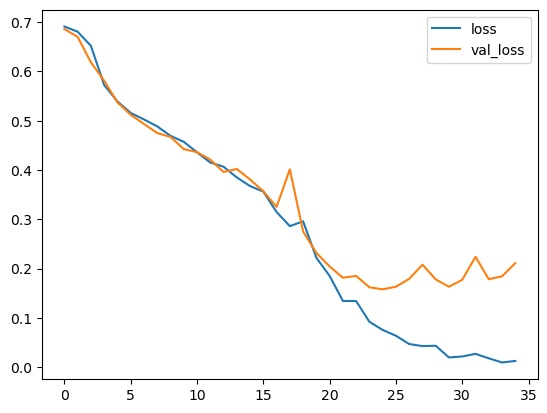

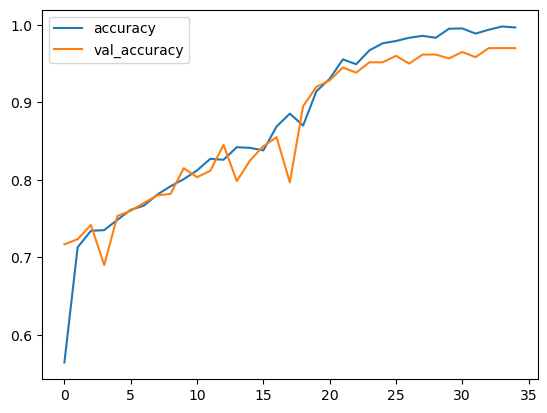

In [21]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [22]:
pred = model.predict(X_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

19/19 [==============================] - 0s 14ms/step


In [23]:
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9449986249961804


In [24]:
mean_accuracy = accuracy_score(y_test, pred)
print("Mean Accuracy Score:", mean_accuracy)

Mean Accuracy Score: 0.945


In [25]:
mean_accuracy = accuracy_score(y_test, pred)
print("Mean Accuracy Score:", mean_accuracy)

Mean Accuracy Score: 0.945


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       296
           1       0.96      0.93      0.94       304

    accuracy                           0.94       600
   macro avg       0.95      0.95      0.94       600
weighted avg       0.95      0.94      0.94       600



In [27]:
image

array([[[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[12, 12, 12],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[12, 12, 12],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[12, 12, 12],
        [12, 12, 12],
        [11, 11, 11],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]]], dtype=uint8)

In [28]:
accuracy_scores = []
for i in range(len(X_test)):
    test_image = np.expand_dims(X_test[i], axis=0)
    true_label = y_test[i]
    predicted_label = model.predict(test_image)
    predicted_class = np.argmax(predicted_label)
    true_class = np.argmax(true_label)
    if predicted_class == true_class:
        accuracy_scores.append(1)
    else:
        accuracy_scores.append(0)

mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy Score:", mean_accuracy)

1/1 [==============================] - 0s 19ms/step
Mean Accuracy Score: 1.0


In [29]:
model = keras.Sequential([
    
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same', input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(5,5), activation="relu", padding='same'),
    layers.MaxPool2D(),
#     layers.Conv2D(filters=128, kernel_size=(5,5), activation="relu", padding='same'),
#     layers.MaxPool2D(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),#
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),#
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=30,
    min_delta=0.001,
    restore_best_weights=True,
)

In [31]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data= (X_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/200
38/38 - 11s - loss: 0.6925 - accuracy: 0.5288 - val_loss: 0.6921 - val_accuracy: 0.5667 - 11s/epoch - 289ms/step
Epoch 2/200
38/38 - 3s - loss: 0.6917 - accuracy: 0.6204 - val_loss: 0.6909 - val_accuracy: 0.7117 - 3s/epoch - 74ms/step
Epoch 3/200
38/38 - 3s - loss: 0.6906 - accuracy: 0.6858 - val_loss: 0.6898 - val_accuracy: 0.7267 - 3s/epoch - 72ms/step
Epoch 4/200
38/38 - 3s - loss: 0.6895 - accuracy: 0.6533 - val_loss: 0.6884 - val_accuracy: 0.7100 - 3s/epoch - 73ms/step
Epoch 5/200
38/38 - 3s - loss: 0.6881 - accuracy: 0.6737 - val_loss: 0.6866 - val_accuracy: 0.7333 - 3s/epoch - 74ms/step
Epoch 6/200
38/38 - 3s - loss: 0.6860 - accuracy: 0.7221 - val_loss: 0.6841 - val_accuracy: 0.7267 - 3s/epoch - 81ms/step
Epoch 7/200
38/38 - 3s - loss: 0.6828 - accuracy: 0.6808 - val_loss: 0.6795 - val_accuracy: 0.7450 - 3s/epoch - 75ms/step
Epoch 8/200
38/38 - 3s - loss: 0.6770 - accuracy: 0.7250 - val_loss: 0.6707 - val_accuracy: 0.7167 - 3s/epoch - 82ms/step
Epoch 9/200
38/38 - 3

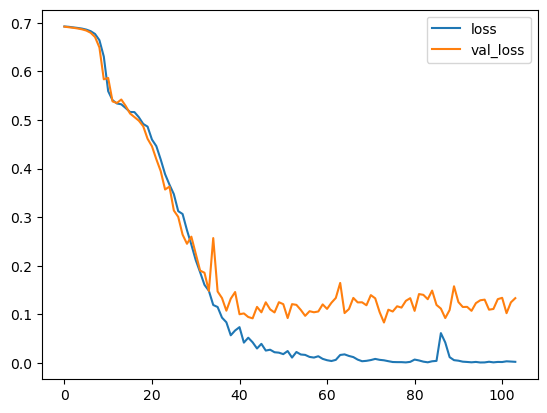

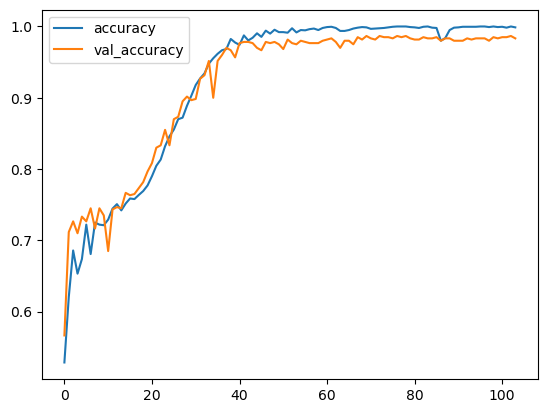

In [32]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [33]:
pred = model.predict(X_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0
     
pred = pred.astype(int)

19/19 [==============================] - 0s 17ms/step


In [34]:
f1 = f1_score(y_test, pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9849996249156061


In [35]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

# 2. Precision
precision = precision_score(y_test, pred)
print("Precision:", precision)

# 3. Recall (Sensitivity)
recall = recall_score(y_test, pred)
print("Recall:", recall)

# 4. F1 Score
f1 = f1_score(y_test, pred)
print("F1 Score:", f1)

# 5. ROC AUC
roc_auc = roc_auc_score(y_test, pred)
print("ROC AUC:", roc_auc)

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.985
Precision: 0.9836065573770492
Recall: 0.9868421052631579
F1 Score: 0.9852216748768473
ROC AUC: 0.984975106685633
Confusion Matrix:
[[291   5]
 [  4 300]]


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       296
           1       0.98      0.99      0.99       304

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.98       600
weighted avg       0.99      0.98      0.98       600

